# ノイズ系
1. GaussNoise
1. Cutout

In [1]:
from albumentations import (
    GaussNoise,
    Cutout
    )
from utils import *

In [2]:
data = get_data()
image = data['image']
image_seg = data['seg_img']
mask = data['mask']
image_det = data['det_img']
bboxes = data['bboxes']

## GaussNoise

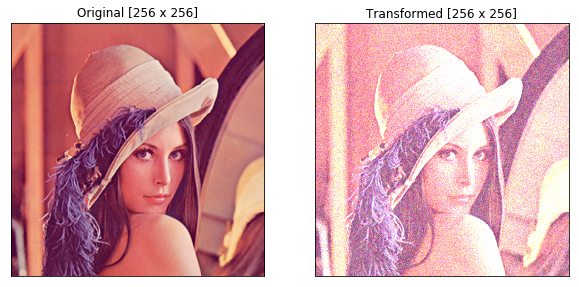

In [3]:
"""Apply gaussian noise to the input image.

Args:
    var_limit ((float, float) or float): variance range for noise. If var_limit is a single float, the range
        will be (-var_limit, var_limit). Default: (10., 50.).
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image

Image types:
    uint8
    
Comment:
    var_limitをfloat1つだけ与えた場合
    稀に、"TypeError: can't convert complex to float"
    が引き起こされるので注意
"""

trans = GaussNoise(var_limit=(460.0,500.0), always_apply=False, p=1)
imshow2(image, transforms=trans)

## Cutout

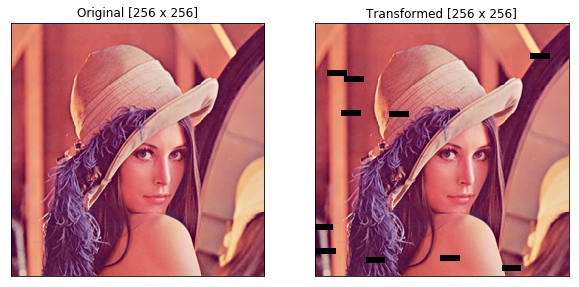

In [4]:
"""CoarseDropout of the square regions in the image.

Args:
    num_holes (int): number of regions to zero out
    max_h_size (int): maximum height of the hole
    max_w_size (int): maximum width of the hole

Targets:
    image

Image types:
    uint8, float32

Reference:
|  https://arxiv.org/abs/1708.04552
|  https://github.com/uoguelph-mlrg/Cutout/blob/master/util/cutout.py
|  https://github.com/aleju/imgaug/blob/master/imgaug/augmenters/arithmetic.py

Comment:
    num_holes: マスクの数
    max_h_size: マスクの最大高さ
    max_w_size: マスクの最大幅
"""

trans = Cutout(num_holes=10, max_h_size=6, max_w_size=20, always_apply=False, p=1)
imshow2(image, transforms=trans)